In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Datasets/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = dataset.iloc[:,:8]
y = dataset.iloc[:,8]
x.shape

(768, 8)

In [5]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_l = model.fit(x, y, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5590 - loss: 9.1337 - val_accuracy: 0.5325 - val_loss: 4.0846
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 2.5538 - val_accuracy: 0.5844 - val_loss: 1.5826
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 1.2388 - val_accuracy: 0.5909 - val_loss: 0.8478
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6566 - loss: 0.8293 - val_accuracy: 0.5844 - val_loss: 0.7199
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7237 - loss: 0.6128 - val_accuracy: 0.5714 - val_loss: 0.7223
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6797 - loss: 0.6181 - val_accuracy: 0.6429 - val_loss: 0.7137
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7129 - loss: 0.5962 - val_accuracy: 0.5974 - val_loss: 0.6975
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6554 - loss: 0.6187 - val_accuracy: 0.5909 - val_los

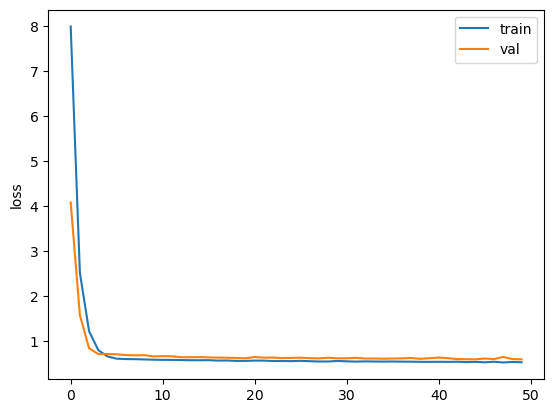

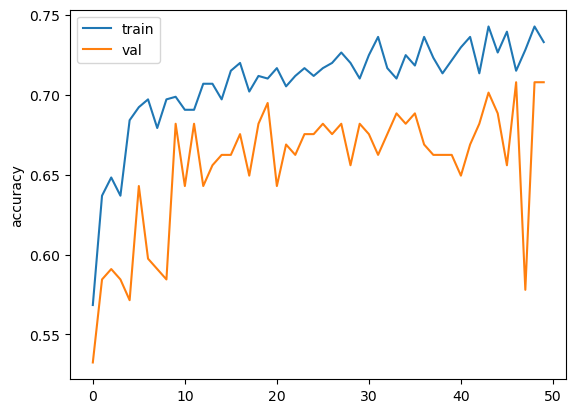

In [16]:
plt.plot(history_l.history['loss'], label = 'train')
plt.plot(history_l.history['val_loss'], label = 'val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_l.history['accuracy'], label = 'train')
plt.plot(history_l.history['val_accuracy'], label = 'val')
plt.ylabel('accuracy')
plt.legend()
plt.show()


